### Scraping e inferencia sobre nuevos datos

En este notebook vamos a utilizar el mejor modelo obtenido para hacer inferencia sobre nuevos datos scrapeados automáticamente

El **scraping**, o web scraping, es la práctica de extraer información de páginas web de forma automatizada

Estamos interesados en extraer de forma automatizata las reseñas y el número de estrellas de un producto vendido en *Amazon*

Ejemplo:  
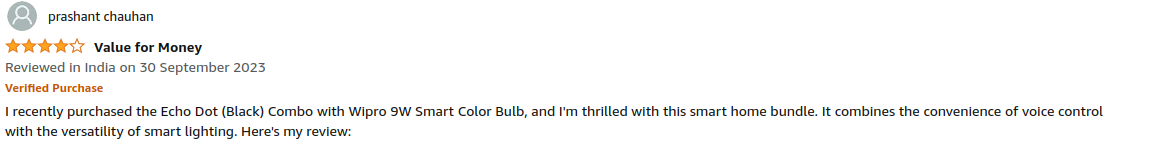

Vamos a extraer la información desde la siguiente página: https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1 

El siguiente script está dividido en los siguientes bloques:

- **BLOQUE A**: Introducción a Requests.
- **BLOQUE B**: Introducción a BeautifulSoup.
- **BLOQUE C**: Extracción de un elemento desde el documento HTML.
- **BLOQUE D**: Extracción automatizata de todas las reseñas y el numero de estrellas presentes en la página.
- **BLOQUE E**: Inferencia sobre el conjunto resultante.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import pickle
import joblib

from nltk.tokenize import word_tokenize
import re

### Bloque A: Introducción a Requests

El módulo *requests* es una biblioteca de Python que facilita el envío de solicitudes HTTP y el manejo de las respuestas. Se utiliza comúnmente para interactuar con servicios web, realizar solicitudes a APIs (interfaces de programación de aplicaciones), y recuperar información de páginas web.

In [5]:
url = "https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1"

In [6]:
# Enviar solicitud para recibir la información (contenido de la página web)
response = requests.get(url)

In [7]:
# Status de la solicitud
response.status_code

200

Algunos de los posibles **status code**:
- 200: la solicitud ha tenido exito
- 404: el recurso solicitado no fue encontrado en el servidor
- 500: error en el servidor al procesar la solicitud
- 503: servidor temporalmente incapaz de manejar la solicitud. 

In [7]:
# Contenido de la respuesta
print(response.text)

<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>
<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>
<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>
<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>
<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>
<link rel="preconnect" href="https://completion.amazon.com" crossorigin>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->

<!-- sp:end-feature:csm:head-open-part2 -->
<!-- sp:featur

In [8]:
# ¿De qué tipo es el contenido de la respuesta?
type(response.text)

str

### Bloque B: introducción a BeautifulSoup

Beautiful Soup es una biblioteca de Python que facilita la extracción de información de documentos HTML y XML. Es comúnmente utilizada para realizar tareas de web scraping, donde se desea extraer datos específicos de una página web.

Beautiful Soup transforma un documento HTML/XML en un árbol de objetos Python que se puede explorar y manipular de manera sencilla.

En este caso el documento que vamos a considerar es en formado HTML.

Ejemplo simple de documento HTML:
``````
<!DOCTYPE html>
<html>
<head>
    <title>Ejemplo HTML</title>
</head>
<body>
    <h1>Hola, mundo!</h1>
    <p>Este es un ejemplo de código HTML.</p>
    <ul>
        <li>Elemento de lista 1</li>
        <li>Elemento de lista 2</li>
        <li>Elemento de lista 3</li>
    </ul>
</body>
</html>
``````

In [9]:
# Convertimos en un objeto BeautifulSoup el contenido de la respuesta (HTML)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!-- sp:end-feature:csm:head-open-

In [10]:
# Comprobamos la conversión a objeto BeautifulSoup
type(soup)

bs4.BeautifulSoup

### Bloque C: Extracción de un elemento

#### Encabezado

In [11]:
# Encontrar el primer elemento con el tag 'head'
header = soup.find('head')
header

<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!-- sp:end-feature:csm:head-open-part2 -->
<!-- sp:feature:aui-assets -->
<link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|

In [12]:
# extraer todo el texto del primer elemento con el tag 'head'
texto = header.text
texto

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAmazon.in:Customer reviews: Echo Dot (3rd Gen) - Smart speaker with Alexa (Black)\n\n\n\n\n\n'

In [13]:
# Eliminar caracteres en blanco al principio y al final del texto
texto.strip()

'Amazon.in:Customer reviews: Echo Dot (3rd Gen) - Smart speaker with Alexa (Black)'

#### Texto de una reseña

In [14]:
# Búsqueda por tag y id de una reseña
review_section = soup.find('div', id="RZOYCQ76NGV0Z")
print(review_section)

<div class="a-section review aok-relative" data-hook="review" id="RZOYCQ76NGV0Z"><div class="a-row a-spacing-none" id="RZOYCQ76NGV0Z-review-card"><div class="a-section celwidget" id="customer_review-RZOYCQ76NGV0Z"><div class="a-row a-spacing-mini" data-hook="genome-widget"><a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AG4ZVZVEVDOT25B7L3LXSMXUZZOA"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">eva</span></div></a></div><div class="a-row"><a class="a-size-base a-link-normal review-tit

In [15]:
# El texto de la reseña esta contenido dentro un tag <span>. ¿Se podría hacer la busqueda por tag?
review_section.find("span")

<span class="a-profile-name">eva</span>

In [16]:
# Busqueda de todo los elementos "span" dentro de review_section
span_tags = review_section.find_all("span")
span_tags

[<span class="a-profile-name">eva</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-letter-space"></span>,
 <span>Alexa</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 12 October 2023</span>,
 <span class="a-declarative" data-action="reviews:filter-action:push-state" data-csa-c-func-deps="aui-da-reviews:filter-action:push-state" data-csa-c-type="widget" data-reviews:filter-action:push-state="{}"><a class="a-link-normal" data-reftag="cm_cr_arp_d_rvw_rvwer" data-reviews-state-param='{"pageNumber":"1","reviewerType":"avp_only_reviews"}' href="/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P?reviewerType=avp_only_reviews"><span class="a-size-mini a-color-state a-text-bold" data-hook="avp-badge">Verified Purchase</span></a></span>,
 <span class="a-size-mini a-color-state a-text-bold" data-hook="avp-badge">Verified Purchase</span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-

In [17]:
# Extraer el texto de la reseña desde la lista de los elementos con tag 'span'
span_tags[8].text

"The voice response is good...it even recognise my younger son voice..Alexa doesn't support YouTube and some Apps.. .sometime it is not responsive even though the network is good.The sound quality is decent ."

In [18]:
# Busqueda por tag + otro elemento
review= review_section.find("span", {'data-hook': 'review-body'})
review

<span class="a-size-base review-text review-text-content" data-hook="review-body">
<span>The voice response is good...it even recognise my younger son voice..<br/>Alexa doesn't support YouTube and some Apps.. .sometime it is not responsive even though the network is good.<br/>The sound quality is decent .</span>
</span>

In [19]:
# Extración el texto
review.text

"\nThe voice response is good...it even recognise my younger son voice..Alexa doesn't support YouTube and some Apps.. .sometime it is not responsive even though the network is good.The sound quality is decent .\n"

### Bloque D: Extracción automatizata de todas las reseñas y el numero de estrellas presentes en la página

In [2]:
# Definición de la función para extraer todas las reseñas y los votos de un producto en una página

def reviews_scraper(url:str) -> pd.DataFrame:

    # Creacíon del dataset donde se iran guaradando las informaciones
    df = pd.DataFrame(columns=['text','stars'])

    # request + parser
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    if r.status_code == 200: # OK

        # Busqueda de todas las sectiones que continen una reseña
        review_sections = soup.find_all('div', {'data-hook': 'review'}) # en este caso no sería efficiente buscar po id

        for item in review_sections:
            # Extracción del texto
            review = item.find('span', {'data-hook': 'review-body'}).text.strip()
            rating = item.find('a', {'data-hook': 'review-title'} ).find('i', {'data-hook': 'review-star-rating'}).text.strip()

            # Nueva fila a agregar
            new_row = {'text': review, 'stars': rating}
            df = df.append(new_row, ignore_index=True)
    
        return df
    
    else:
        raise TypeError(f'Error en scraper la página, error:{r.status_code}')


In [3]:
url = "https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1"

df = reviews_scraper(url)
df

,text,stars
0,I recently purchased the Echo Dot (Black) Comb...,4.0 out of 5 stars
1,The voice response is good...it even recognise...,4.0 out of 5 stars
2,Awesome 👌 👏,4.0 out of 5 stars
3,With in 2 year it’s get faulty the speaker is ...,4.0 out of 5 stars
4,Product is good with out any problems.But soun...,4.0 out of 5 stars
5,Excellent response,4.0 out of 5 stars
6,Accha product h,4.0 out of 5 stars
7,Good,4.0 out of 5 stars
8,Best in the market,5.0 out of 5 stars
9,5-Star,5.0 out of 5 stars


In [4]:
# limpieza de la variable stars
df['stars'] = df['stars'].apply(lambda x: x[:3])
df

,text,stars
0,I recently purchased the Echo Dot (Black) Comb...,4.0
1,The voice response is good...it even recognise...,4.0
2,Awesome 👌 👏,4.0
3,With in 2 year it’s get faulty the speaker is ...,4.0
4,Product is good with out any problems.But soun...,4.0
5,Excellent response,4.0
6,Accha product h,4.0
7,Good,4.0
8,Best in the market,5.0
9,5-Star,5.0


In [11]:
# guardamos el conjunto resultante
df.to_csv('../data/scraped_reviews.csv', index=False)

### BLOQUE E: Inferencia sobre el conjunto resultante
En esta última fase, vamos a hacer inferencia sobre el nuevo conjunto de datos.

In [6]:
# Función para preprocesar el texto en crudo
def preprocess(text):    

    # Definir patrones para reemplazar/eliminar.
    alphaPattern      = "[^a-zA-Z]"
    sequencePattern   = r"(.)\1\1\1*"
    seqReplacePattern = r"\1\1"    

    
    # Crear lista de stopwords
    en_stop = set(['a', 'an', 'the', 'in', 'does', 'do']) #set(stopwords.words('english')) - {'not','no'}

    # Lower Casing
    text = text.lower()

    # Reemplazar non-alphabets.
    text = re.sub(alphaPattern, " ", text)

     # Reemplazar letras consecutivas.
    text = re.sub(sequencePattern, seqReplacePattern, text)
    
    # Tokenizar texto
    tokens = word_tokenize(text)

    # Eliminar stopwords
    tokens = [word for word in tokens if word not in en_stop]
    
    # Eliminar stringas con menos de dos elementos
    tokens = [word for word in tokens if len(word)>2]
    
        
    return tokens

In [7]:
# Cargar el vectorizer
vectorizer = joblib.load('../models/tfidf_vectorizer.joblib')
vectorizer

TfidfVectorizer()

In [9]:
# Cargar el modelo 
with open('../models/gradient_boosting_model.pkl', 'rb') as file:
    model = pickle.load(file)

model

GradientBoostingClassifier(learning_rate=0.2, n_estimators=150, random_state=0)

In [10]:
# Preprocesamos el nuevo texto
test_texts =  df['text'].apply(preprocess)
test_texts_vec = vectorizer.transform([" ".join(tokens) for tokens in test_texts])

In [11]:
# Inferencia de las nuevas reseñas
model.predict(test_texts_vec)

array([1, 1, 2, 1, 1, 2, 2, 2, 2, 1])

Estas últimas reseñas eran todas positivas. En este último paso, crearemos unas reseñas negativas manualmente para probar como de bien funciona el modelo con este tipo de textos.

In [17]:
# Reseñas negativa
neg_text = [ "Bad experience! The worst product.", "How can they sell this product?Too bad"]

# Procesiamento
preprocessed_text= [preprocess(el) for el in neg_text]
neg_text = vectorizer.transform([" ".join(tokens) for tokens in preprocessed_text])

In [18]:
# Inferencia reseñas negativa
model.predict(neg_text)

array([1, 1])